<a href="https://colab.research.google.com/github/devreon/Domino_recognition_yolov5/blob/main/YOLOV5DOMINO_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Использование YOLOv5 для задачи распознавания домино**


# **1.Принцип работы YOLOv5**
YOLO (You Only Look Once) — архитектура нейронных сетей, предназначенная для детекции объектов на изображении. Отличительной особенностью YOLO является подход к решению задачи детекции.

Один из способов решения задачи детекции заключается в разбиении изображения на квадратные области, затем классификация этих областей на наличие объекта и классификация самого объекта. Таким образом, изображение просматривается дважды (один раз для определения областей, где есть объект, второй — для классификации этого объекта).

Этот способ работает долго и требует больших затрат вычислительных мощностей.

YOLO же использует другой принцип. Исходное изображение сжимается таким образом, чтобы получить квадратную матрицу размером 13 на 13, в каждой клетке которой записана информация о наличии объекта и классе этого объекта на соответствующей части картинки. Таким образом, YOLO просматривает картинку один раз, что существенно увеличивает скорость обработки.

YOLOv5 – усовершенствованная пятая версия YOLO, реализованная на фреймворке PyTorch. YOLOv5 встроена в одноименный модуль для Python3, который можно установить с pypi. Этот модуль предоставляет очень хорошую инфраструктуру как для обучения модели, так и для тестирования с построением графиков всех ключевых показателей.

В YOLOv5 функция активации Leaky ReLU используется в средних/скрытых слоях:

$$Leaky ReLU = max(0.1x,x)$$

Сигмовидная функция активации используется в последнем слое обнаружения:

$$Sigmoid =  sigma = \frac{1}{1+e^{-x}}$$

Используем три изображения для нейросети:

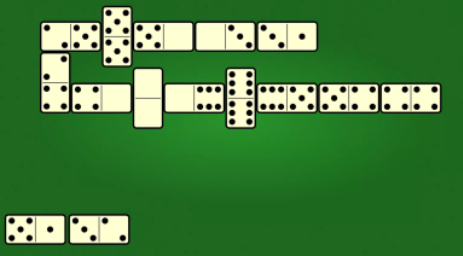

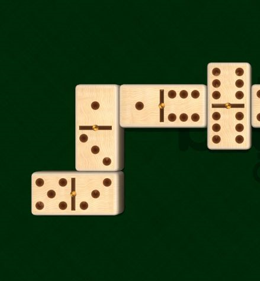

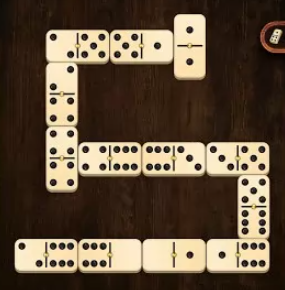

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-132-g014acde torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.9/78.2 GB disk)


In [ ]:
!unzip -q /content/train_data.zip -d /content

# **2.Обучение нейронной сети**
Перед запуском обучения понадобятся параметры, с которыми запускается:


1.   —img — размер изображения, подаваемого на вход yolo. Это значит, что размер исходного изображения преобразуется к виду n x n, где n — число, введенное пользователем после ключа —img. n должно быть кратно 32 (это связано с архитектурой yolo)
2.   —batch — размер батча, то есть количество картинок, одновременно подаваемых на вход yolo
3.   —epoch — количество эпох для обучения
4.   —data — путь до .yaml файла
5.   —weights — путь до файла весов

Для обучения были выбраны данные параметры:
*   img 100
*   batch 20
*   epochs 150

In [ ]:
!python train.py --img 100 --batch 20 --epochs 150 --data my_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=my_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=20, imgsz=100, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-132-g014acde torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0

In [ ]:
!unzip -q /content/image.zip -d /content

replace /content/image/Screenshot_1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.2 --source /content/image --save-txt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/image, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-132-g014acde torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7085641 parameters, 0 gradients, 16.0 GFLOPs
image 1/9 /content/image/5_566.600x600.jpg: 576x640 1 4x2, Done. (0.034s)
image 2/9 /content/image/Screenshot_1.png: 384x640 1 0x0, 1 3x0, 1 3x1, 1 3x2, 1 4x0, 2 4x2s, 1 4x4, 1 5x0, 1 5x1, 1 5x2, 1 5x4, 2 5x5s, 1 6x0, 1 6x5, 2 6x6s, Done. (0.028s)
image 3/9 /content/image/Screenshot_2.png: 640x640 1 1x0, 1 1x1, 1 4x1, 1 4x2, 1 4x3, 1 4x4, 1 5x1, 2 5x2s, 2 5x3s, 

Вывод первого изображения: 


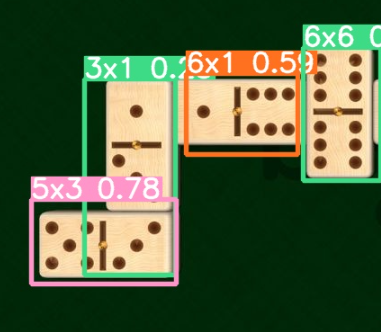

Вывод второго изображения: 


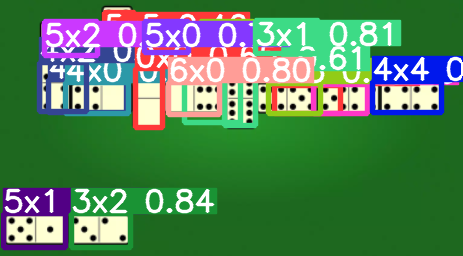

Вывод третьего изображения: 


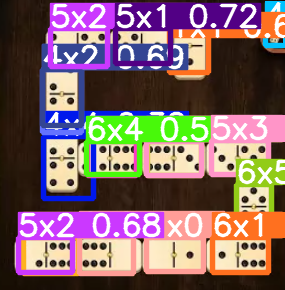

Вывод четвертого изображения: 


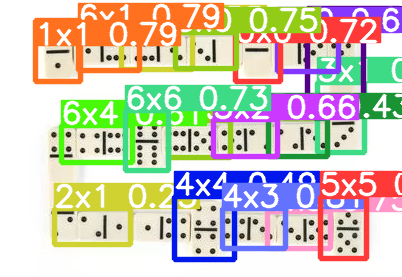

In [ ]:
from IPython.display import display
from IPython.display import Image
from PIL import Image 
path="/content/yolov5/runs/detect/exp6"

print("Вывод первого изображения: ")
image1 = Image.open(path+'/Screenshot_33.png')
display(image1)

print("Вывод второго изображения: ")
image2 = Image.open(path+'/Screenshot_1.png')
display(image2)

print("Вывод третьего изображения: ")
image3 = Image.open(path+'/Screenshot_2.png')
display(image3)

print("Вывод четвертого изображения: ")
image4 = Image.open(path+'/Screenshot_24.png')
display(image4)



# **3.Вывод**
Исходя из проделанной работы, можно сказать, что данная нейронная сеть хорошо определяет домино на столе.
Минусом является скорость обучения.
Для лучшего результата нужно много примеров и много времени.